# Examples using `blackmarblepy`

## Requirements

In [1]:
#!pip install blackmarblepy

In [2]:
import os

import colorcet as cc
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from gadm import GADMDownloader

from blackmarble.bm_extract import bm_extract
from blackmarble.bm_raster import bm_raster

### Create NASA Earthdata Bearer Token

**BlackMarblePy** requires using [NASA Earthdata](**BlackMarblePy**) **bearer token**. To obtain a token, please follow the steps below:

1. Go to the [NASA LAADS Archive](https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/5000/VNP46A3/)
2. Click "Login" (bottom on top right); create an account if needed.
3. Click "See wget Download Command" (bottom near top, in the middle)
4. After clicking, you will see text that can be used to download data. The "Bearer" token will be a long string in red.

### Define NASA bearer token 

For instructions on obtaining a NASA bearer token, please see above.

In [3]:
bearer = os.getenv("BLACKMARBLE_TOKEN")

### Define Region of Interest

Define region of interest for where we want to download nighttime lights data.

In [4]:
gdf = GADMDownloader(version="4.0").get_shape_data_by_country_name(
    country_name="GHA", ad_level=1
)
gdf.explore()

## Create raster of nighttime lights

In this section, we show examples of creating daily, monthly, and annual rasters of nighttime lights for the **Region of Interest** selected.


### Daily

In [5]:
# Daily data: raster for February 5, 2021
r_20210205 = bm_raster(
    gdf, product_id="VNP46A2", date_range="2021-02-05", bearer=bearer
)

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/4.41M [00:00<?, ?B/s]

  0%|          | 0.00/5.58M [00:00<?, ?B/s]

  0%|          | 0.00/3.26M [00:00<?, ?B/s]

  0%|          | 0.00/3.15M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
r_20210205

<xarray.Dataset>
Dimensions:   (x: 1067, y: 1544, time: 1)
Coordinates:
  * x         (x) float64 -3.252 -3.248 -3.244 -3.24 ... 1.177 1.181 1.185 1.19
  * y         (y) float64 11.17 11.17 11.16 11.16 ... 4.756 4.752 4.748 4.744
  * time      (time) datetime64[ns] 2021-02-05
Data variables:
    radiance  (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/43)
    AlgorithmType:                     b'SCI'
    AREA_OR_POINT:                     Area
    DataResolution:                    b'Moderate'
    DayNightFlag:                      b'Day'
    EastBoundingCoord:                 0.0
    EndTime:                           b'2021-02-05 23:59:59.000'
    ...                                ...
    VerticalTileNumber:                b'07'
    WestBoundingCoord:                 -10.0
    scale_factor:                      1.0
    add_offset:                        0.0
    units:                             Watts per square meter per steradian (...
    description:                       Radiance

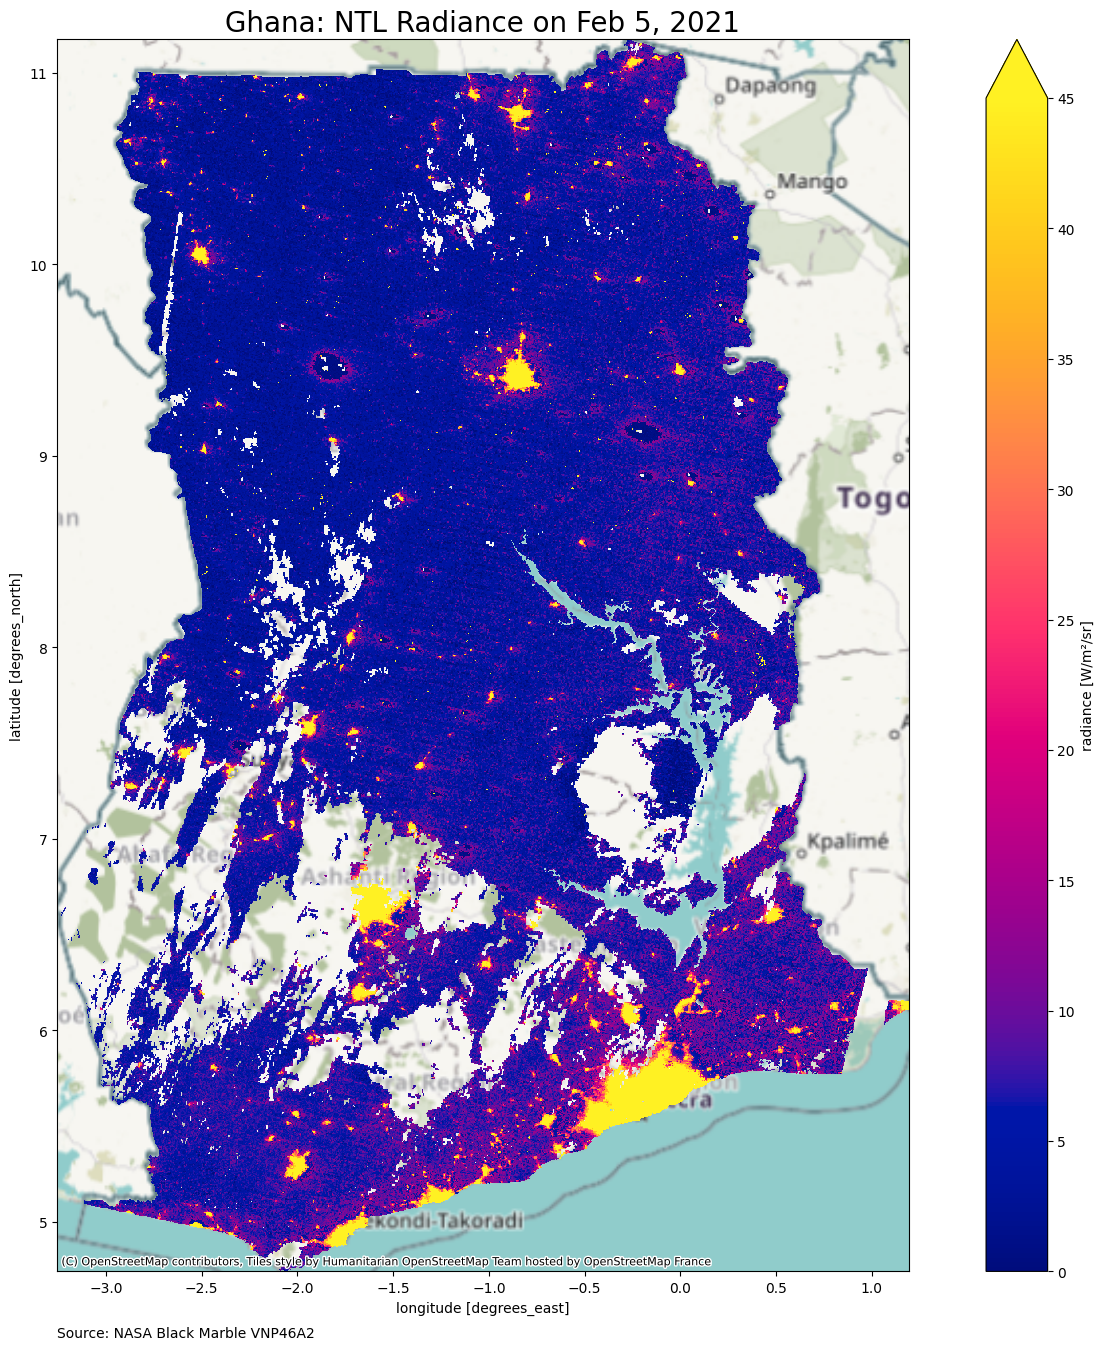

In [7]:
fig, ax = plt.subplots(figsize=(20, 16))

r_20210205.radiance.sel(time="2021-02-05").plot.pcolormesh(
    ax=ax,
    cmap=cc.cm.bmy,
    robust=True,
)
cx.add_basemap(ax, crs=gdf.crs.to_string())

ax.text(
    0,
    -0.05,
    "Source: NASA Black Marble VNP46A2",
    ha="left",
    va="center",
    transform=ax.transAxes,
    fontsize=10,
    color="black",
    weight="normal",
)
ax.set_title("Ghana: NTL Radiance on Feb 5, 2021", fontsize=20);

### Monthly

In [8]:
# Monthly data: raster for October 2021
r_202110 = bm_raster(gdf, product_id="VNP46A3", date_range="2021-10-01", bearer=bearer)

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/7.72M [00:00<?, ?B/s]

  0%|          | 0.00/10.6M [00:00<?, ?B/s]

  0%|          | 0.00/8.64M [00:00<?, ?B/s]

  0%|          | 0.00/11.5M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

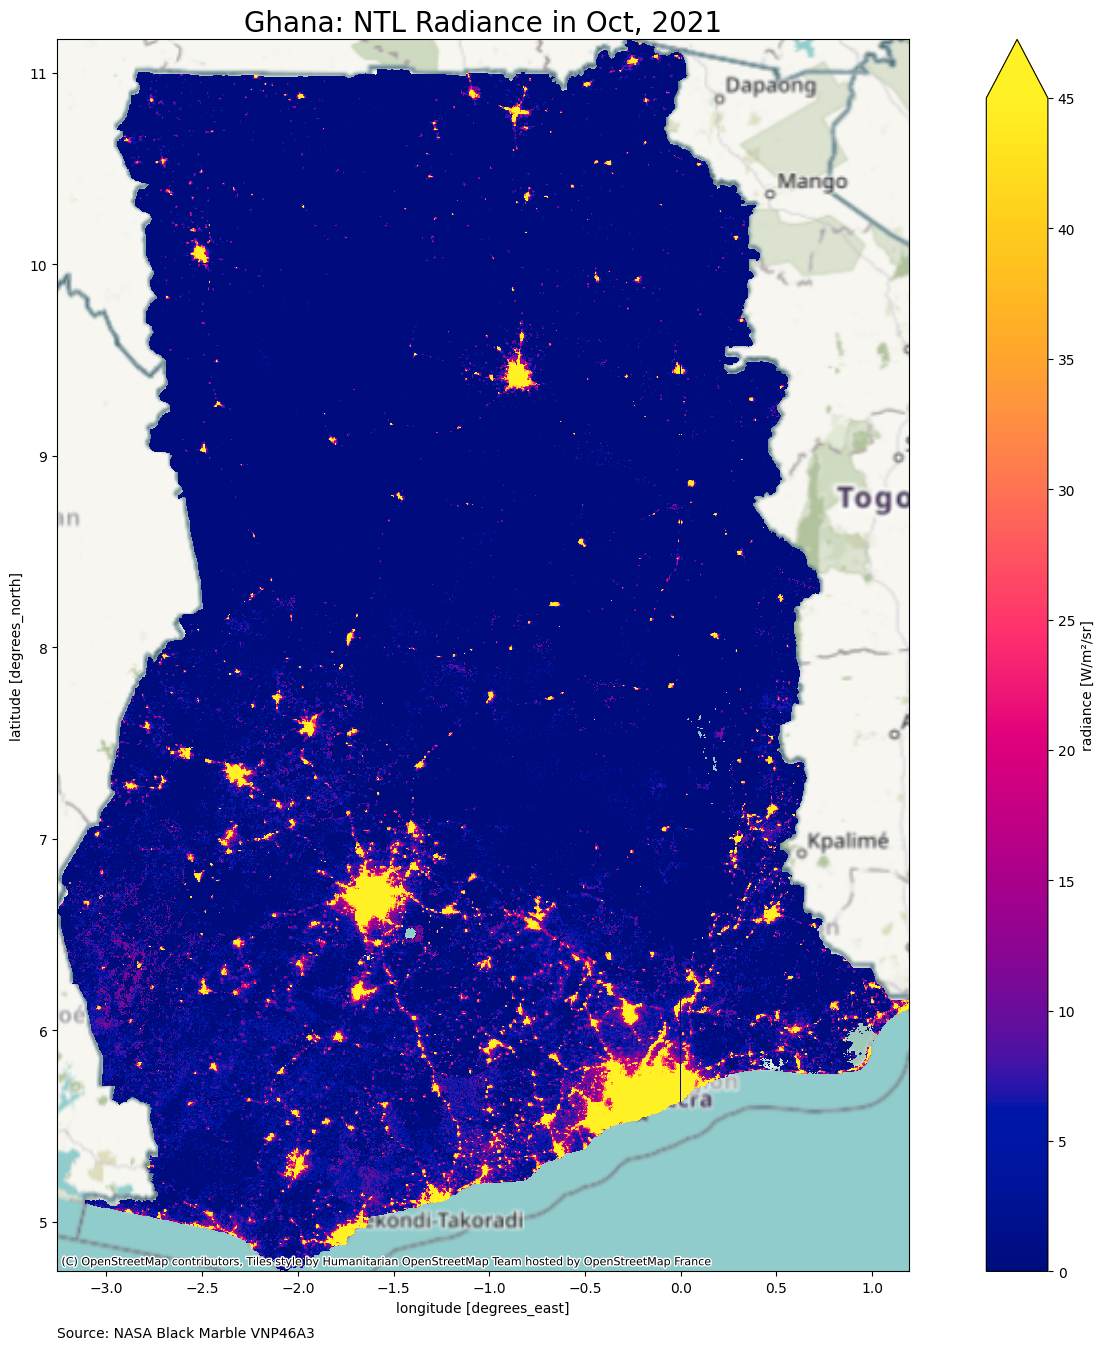

In [9]:
fig, ax = plt.subplots(figsize=(20, 16))

r_202110.radiance.sel(time="2021-10-01").plot.pcolormesh(
    ax=ax,
    cmap=cc.cm.bmy,
    robust=True,
)
cx.add_basemap(ax, crs=gdf.crs.to_string())

ax.text(
    0,
    -0.05,
    "Source: NASA Black Marble VNP46A3",
    ha="left",
    va="center",
    transform=ax.transAxes,
    fontsize=10,
    color="black",
    weight="normal",
)
ax.set_title("Ghana: NTL Radiance in Oct, 2021", fontsize=20);

### Annual

In [10]:
### Annual data: raster for 2021
r_2021 = bm_raster(gdf, product_id="VNP46A4", date_range="2021-01-01", bearer=bearer)

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/14.0M [00:00<?, ?B/s]

  0%|          | 0.00/9.37M [00:00<?, ?B/s]

  0%|          | 0.00/9.66M [00:00<?, ?B/s]

  0%|          | 0.00/13.8M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

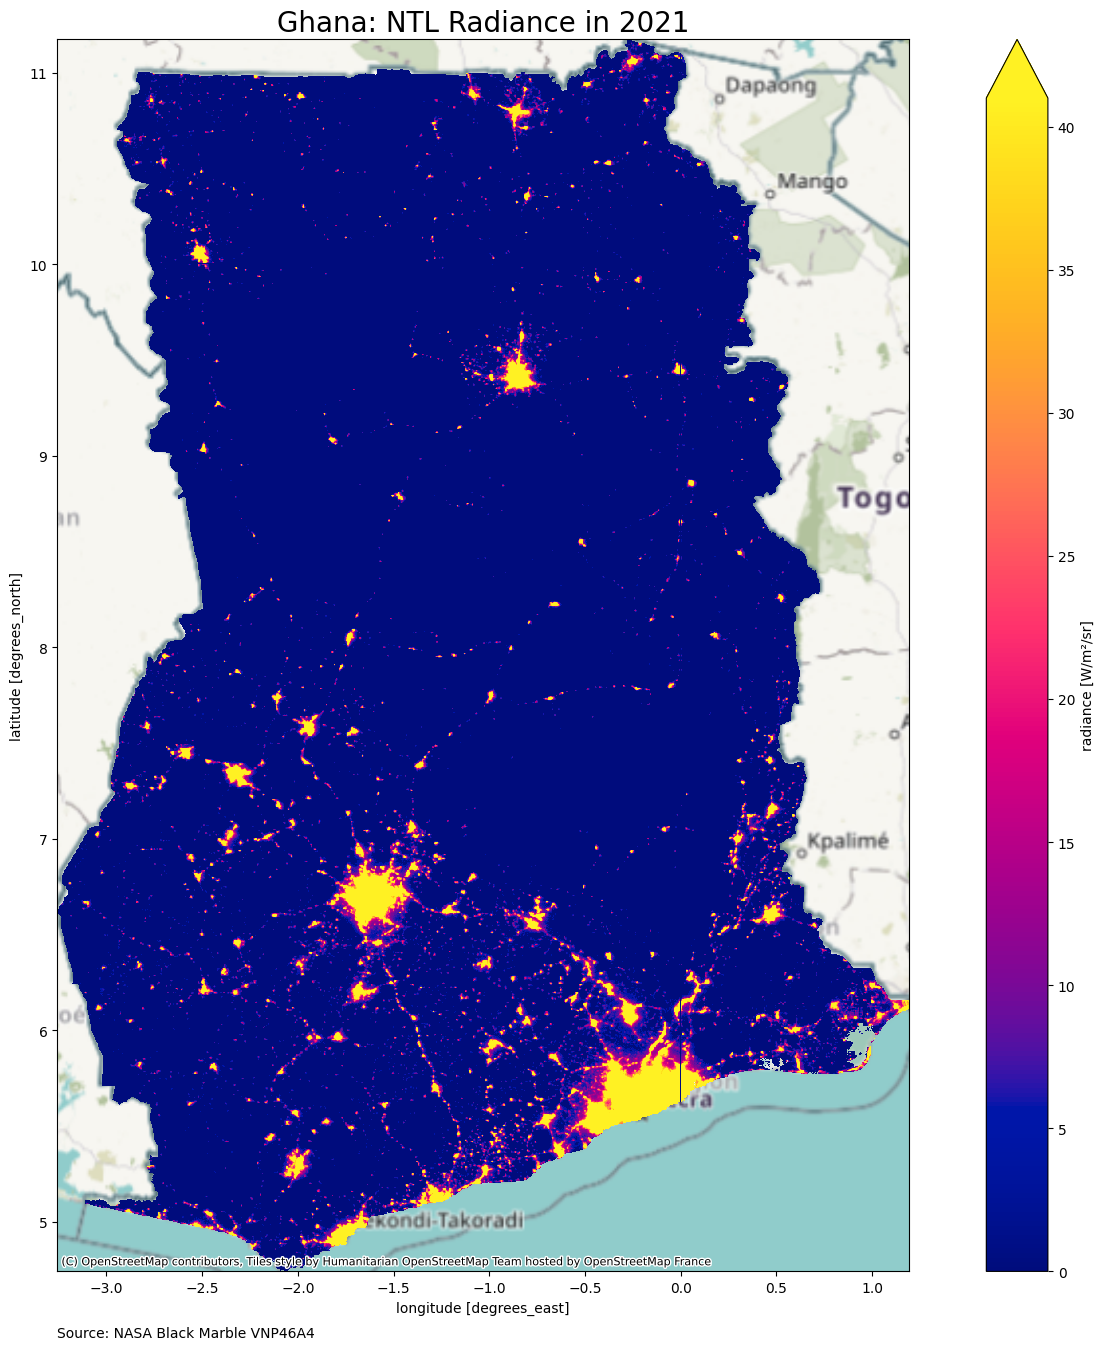

In [11]:
fig, ax = plt.subplots(figsize=(20, 16))

r_2021.radiance.sel(time="2021-01-01").plot.pcolormesh(
    ax=ax,
    cmap=cc.cm.bmy,
    robust=True,
)
cx.add_basemap(ax, crs=gdf.crs.to_string())

ax.text(
    0,
    -0.05,
    "Source: NASA Black Marble VNP46A4",
    ha="left",
    va="center",
    transform=ax.transAxes,
    fontsize=10,
    color="black",
    weight="normal",
)
ax.set_title("Ghana: NTL Radiance in 2021", fontsize=20);

## Create a raster stack of nighttime lights across multiple time periods

In this section, we illustrate how to retrieve and extract [NASA Black Marble](https://blackmarble.gsfc.nasa.gov) data for multiple time periods. The function will return a raster stack, where each raster band corresponds to a different date. The following code snippet provides examples of getting data across multiple days, months, and years. For each example, we define a date range using [`pd.date_range`](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html).

In [12]:
#### Raster stack of daily data
date_range = pd.date_range("2022-01-01", "2022-03-31", freq="D")

r_daily = bm_raster(
    gdf,
    product_id="VNP46A2",
    date_range=date_range,
    bearer=bearer,
)

QUEUEING TASKS | Downloading...:   0%|          | 0/360 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 0.00/2.72M [00:00<?, ?B/s]

  0%|          | 0.00/3.17M [00:00<?, ?B/s]

  0%|          | 0.00/2.45M [00:00<?, ?B/s]

  0%|          | 0.00/2.57M [00:00<?, ?B/s]

  0%|          | 0.00/4.36M [00:00<?, ?B/s]

  0%|          | 0.00/1.87M [00:00<?, ?B/s]

  0%|          | 0.00/4.12M [00:00<?, ?B/s]

  0%|          | 0.00/4.89M [00:00<?, ?B/s]

  0%|          | 0.00/1.76M [00:00<?, ?B/s]

  0%|          | 0.00/2.78M [00:00<?, ?B/s]

  0%|          | 0.00/4.45M [00:00<?, ?B/s]

  0%|          | 0.00/2.79M [00:00<?, ?B/s]

  0%|          | 0.00/2.55M [00:00<?, ?B/s]

  0%|          | 0.00/3.61M [00:00<?, ?B/s]

  0%|          | 0.00/1.56M [00:00<?, ?B/s]

  0%|          | 0.00/2.98M [00:00<?, ?B/s]

  0%|          | 0.00/4.06M [00:00<?, ?B/s]

  0%|          | 0.00/5.25M [00:00<?, ?B/s]

  0%|          | 0.00/1.99M [00:00<?, ?B/s]

  0%|          | 0.00/2.88M [00:00<?, ?B/s]

  0%|          | 0.00/1.51M [00:00<?, ?B/s]

  0%|          | 0.00/4.58M [00:00<?, ?B/s]

  0%|          | 0.00/1.71M [00:00<?, ?B/s]

  0%|          | 0.00/3.78M [00:00<?, ?B/s]

  0%|          | 0.00/4.66M [00:00<?, ?B/s]

  0%|          | 0.00/5.44M [00:00<?, ?B/s]

  0%|          | 0.00/2.81M [00:00<?, ?B/s]

  0%|          | 0.00/3.03M [00:00<?, ?B/s]

  0%|          | 0.00/4.09M [00:00<?, ?B/s]

  0%|          | 0.00/2.56M [00:00<?, ?B/s]

  0%|          | 0.00/5.05M [00:00<?, ?B/s]

  0%|          | 0.00/6.73M [00:00<?, ?B/s]

  0%|          | 0.00/2.42M [00:00<?, ?B/s]

  0%|          | 0.00/3.66M [00:00<?, ?B/s]

  0%|          | 0.00/2.46M [00:00<?, ?B/s]

  0%|          | 0.00/2.00M [00:00<?, ?B/s]

  0%|          | 0.00/3.99M [00:00<?, ?B/s]

  0%|          | 0.00/2.19M [00:00<?, ?B/s]

  0%|          | 0.00/3.84M [00:00<?, ?B/s]

  0%|          | 0.00/2.40M [00:00<?, ?B/s]

  0%|          | 0.00/1.73M [00:00<?, ?B/s]

  0%|          | 0.00/5.16M [00:00<?, ?B/s]

  0%|          | 0.00/3.84M [00:00<?, ?B/s]

  0%|          | 0.00/1.37M [00:00<?, ?B/s]

  0%|          | 0.00/3.71M [00:00<?, ?B/s]

  0%|          | 0.00/6.76M [00:00<?, ?B/s]

  0%|          | 0.00/4.45M [00:00<?, ?B/s]

  0%|          | 0.00/2.97M [00:00<?, ?B/s]

  0%|          | 0.00/2.09M [00:00<?, ?B/s]

  0%|          | 0.00/1.46M [00:00<?, ?B/s]

  0%|          | 0.00/2.01M [00:00<?, ?B/s]

  0%|          | 0.00/1.63M [00:00<?, ?B/s]

  0%|          | 0.00/4.18M [00:00<?, ?B/s]

  0%|          | 0.00/6.57M [00:00<?, ?B/s]

  0%|          | 0.00/3.54M [00:00<?, ?B/s]

  0%|          | 0.00/3.66M [00:00<?, ?B/s]

  0%|          | 0.00/2.04M [00:00<?, ?B/s]

  0%|          | 0.00/4.10M [00:00<?, ?B/s]

  0%|          | 0.00/4.93M [00:00<?, ?B/s]

  0%|          | 0.00/3.64M [00:00<?, ?B/s]

  0%|          | 0.00/2.25M [00:00<?, ?B/s]

  0%|          | 0.00/1.52M [00:00<?, ?B/s]

  0%|          | 0.00/4.50M [00:00<?, ?B/s]

  0%|          | 0.00/2.18M [00:00<?, ?B/s]

  0%|          | 0.00/2.69M [00:00<?, ?B/s]

  0%|          | 0.00/5.80M [00:00<?, ?B/s]

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

  0%|          | 0.00/3.05M [00:00<?, ?B/s]

  0%|          | 0.00/2.90M [00:00<?, ?B/s]

  0%|          | 0.00/4.44M [00:00<?, ?B/s]

  0%|          | 0.00/5.52M [00:00<?, ?B/s]

  0%|          | 0.00/2.73M [00:00<?, ?B/s]

  0%|          | 0.00/4.40M [00:00<?, ?B/s]

  0%|          | 0.00/2.18M [00:00<?, ?B/s]

  0%|          | 0.00/3.39M [00:00<?, ?B/s]

  0%|          | 0.00/2.23M [00:00<?, ?B/s]

  0%|          | 0.00/4.11M [00:00<?, ?B/s]

  0%|          | 0.00/1.84M [00:00<?, ?B/s]

  0%|          | 0.00/2.64M [00:00<?, ?B/s]

  0%|          | 0.00/3.77M [00:00<?, ?B/s]

  0%|          | 0.00/3.49M [00:00<?, ?B/s]

  0%|          | 0.00/2.58M [00:00<?, ?B/s]

  0%|          | 0.00/6.14M [00:00<?, ?B/s]

  0%|          | 0.00/1.72M [00:00<?, ?B/s]

  0%|          | 0.00/2.18M [00:00<?, ?B/s]

  0%|          | 0.00/4.70M [00:00<?, ?B/s]

  0%|          | 0.00/1.80M [00:00<?, ?B/s]

  0%|          | 0.00/5.77M [00:00<?, ?B/s]

  0%|          | 0.00/3.99M [00:00<?, ?B/s]

  0%|          | 0.00/8.42M [00:00<?, ?B/s]

  0%|          | 0.00/6.75M [00:00<?, ?B/s]

  0%|          | 0.00/2.43M [00:00<?, ?B/s]

  0%|          | 0.00/6.31M [00:00<?, ?B/s]

  0%|          | 0.00/3.48M [00:00<?, ?B/s]

  0%|          | 0.00/5.66M [00:00<?, ?B/s]

  0%|          | 0.00/2.79M [00:00<?, ?B/s]

  0%|          | 0.00/3.25M [00:00<?, ?B/s]

  0%|          | 0.00/1.86M [00:00<?, ?B/s]

  0%|          | 0.00/3.26M [00:00<?, ?B/s]

  0%|          | 0.00/2.31M [00:00<?, ?B/s]

  0%|          | 0.00/3.91M [00:00<?, ?B/s]

  0%|          | 0.00/2.62M [00:00<?, ?B/s]

  0%|          | 0.00/2.32M [00:00<?, ?B/s]

  0%|          | 0.00/4.01M [00:00<?, ?B/s]

  0%|          | 0.00/4.02M [00:00<?, ?B/s]

  0%|          | 0.00/2.48M [00:00<?, ?B/s]

  0%|          | 0.00/4.86M [00:00<?, ?B/s]

  0%|          | 0.00/2.10M [00:00<?, ?B/s]

  0%|          | 0.00/3.98M [00:00<?, ?B/s]

  0%|          | 0.00/3.04M [00:00<?, ?B/s]

  0%|          | 0.00/5.09M [00:00<?, ?B/s]

  0%|          | 0.00/2.59M [00:00<?, ?B/s]

  0%|          | 0.00/4.31M [00:00<?, ?B/s]

  0%|          | 0.00/2.76M [00:00<?, ?B/s]

  0%|          | 0.00/2.82M [00:00<?, ?B/s]

  0%|          | 0.00/5.12M [00:00<?, ?B/s]

  0%|          | 0.00/1.39M [00:00<?, ?B/s]

  0%|          | 0.00/4.15M [00:00<?, ?B/s]

  0%|          | 0.00/3.56M [00:00<?, ?B/s]

  0%|          | 0.00/1.69M [00:00<?, ?B/s]

  0%|          | 0.00/4.84M [00:00<?, ?B/s]

  0%|          | 0.00/4.11M [00:00<?, ?B/s]

  0%|          | 0.00/3.36M [00:00<?, ?B/s]

  0%|          | 0.00/2.81M [00:00<?, ?B/s]

  0%|          | 0.00/6.15M [00:00<?, ?B/s]

  0%|          | 0.00/2.61M [00:00<?, ?B/s]

  0%|          | 0.00/5.31M [00:00<?, ?B/s]

  0%|          | 0.00/3.36M [00:00<?, ?B/s]

  0%|          | 0.00/6.31M [00:00<?, ?B/s]

  0%|          | 0.00/3.01M [00:00<?, ?B/s]

  0%|          | 0.00/6.96M [00:00<?, ?B/s]

  0%|          | 0.00/3.39M [00:00<?, ?B/s]

  0%|          | 0.00/3.17M [00:00<?, ?B/s]

  0%|          | 0.00/4.16M [00:00<?, ?B/s]

  0%|          | 0.00/7.20M [00:00<?, ?B/s]

  0%|          | 0.00/3.13M [00:00<?, ?B/s]

  0%|          | 0.00/3.00M [00:00<?, ?B/s]

  0%|          | 0.00/4.71M [00:00<?, ?B/s]

  0%|          | 0.00/4.80M [00:00<?, ?B/s]

  0%|          | 0.00/2.84M [00:00<?, ?B/s]

  0%|          | 0.00/2.29M [00:00<?, ?B/s]

  0%|          | 0.00/4.12M [00:00<?, ?B/s]

  0%|          | 0.00/4.78M [00:00<?, ?B/s]

  0%|          | 0.00/2.98M [00:00<?, ?B/s]

  0%|          | 0.00/4.27M [00:00<?, ?B/s]

  0%|          | 0.00/1.48M [00:00<?, ?B/s]

  0%|          | 0.00/4.63M [00:00<?, ?B/s]

  0%|          | 0.00/4.17M [00:00<?, ?B/s]

  0%|          | 0.00/1.97M [00:00<?, ?B/s]

  0%|          | 0.00/3.71M [00:00<?, ?B/s]

  0%|          | 0.00/2.75M [00:00<?, ?B/s]

  0%|          | 0.00/4.31M [00:00<?, ?B/s]

  0%|          | 0.00/2.84M [00:00<?, ?B/s]

  0%|          | 0.00/4.37M [00:00<?, ?B/s]

  0%|          | 0.00/3.43M [00:00<?, ?B/s]

  0%|          | 0.00/3.70M [00:00<?, ?B/s]

  0%|          | 0.00/2.15M [00:00<?, ?B/s]

  0%|          | 0.00/2.77M [00:00<?, ?B/s]

  0%|          | 0.00/4.06M [00:00<?, ?B/s]

  0%|          | 0.00/4.05M [00:00<?, ?B/s]

  0%|          | 0.00/1.86M [00:00<?, ?B/s]

  0%|          | 0.00/2.34M [00:00<?, ?B/s]

  0%|          | 0.00/4.67M [00:00<?, ?B/s]

  0%|          | 0.00/1.19M [00:00<?, ?B/s]

  0%|          | 0.00/6.08M [00:00<?, ?B/s]

  0%|          | 0.00/2.03M [00:00<?, ?B/s]

  0%|          | 0.00/2.44M [00:00<?, ?B/s]

  0%|          | 0.00/4.81M [00:00<?, ?B/s]

  0%|          | 0.00/2.43M [00:00<?, ?B/s]

  0%|          | 0.00/2.44M [00:00<?, ?B/s]

  0%|          | 0.00/6.07M [00:00<?, ?B/s]

  0%|          | 0.00/5.83M [00:00<?, ?B/s]

  0%|          | 0.00/2.16M [00:00<?, ?B/s]

  0%|          | 0.00/1.88M [00:00<?, ?B/s]

  0%|          | 0.00/4.00M [00:00<?, ?B/s]

  0%|          | 0.00/2.74M [00:00<?, ?B/s]

  0%|          | 0.00/5.29M [00:00<?, ?B/s]

  0%|          | 0.00/4.34M [00:00<?, ?B/s]

  0%|          | 0.00/4.81M [00:00<?, ?B/s]

  0%|          | 0.00/2.90M [00:00<?, ?B/s]

  0%|          | 0.00/3.62M [00:00<?, ?B/s]

  0%|          | 0.00/4.45M [00:00<?, ?B/s]

  0%|          | 0.00/2.20M [00:00<?, ?B/s]

  0%|          | 0.00/2.12M [00:00<?, ?B/s]

  0%|          | 0.00/3.21M [00:00<?, ?B/s]

  0%|          | 0.00/1.40M [00:00<?, ?B/s]

  0%|          | 0.00/3.55M [00:00<?, ?B/s]

  0%|          | 0.00/2.48M [00:00<?, ?B/s]

  0%|          | 0.00/4.36M [00:00<?, ?B/s]

  0%|          | 0.00/2.38M [00:00<?, ?B/s]

  0%|          | 0.00/2.31M [00:00<?, ?B/s]

  0%|          | 0.00/5.05M [00:00<?, ?B/s]

  0%|          | 0.00/1.79M [00:00<?, ?B/s]

  0%|          | 0.00/3.98M [00:00<?, ?B/s]

  0%|          | 0.00/4.00M [00:00<?, ?B/s]

  0%|          | 0.00/3.74M [00:00<?, ?B/s]

  0%|          | 0.00/3.98M [00:00<?, ?B/s]

  0%|          | 0.00/3.49M [00:00<?, ?B/s]

  0%|          | 0.00/2.72M [00:00<?, ?B/s]

  0%|          | 0.00/1.19M [00:00<?, ?B/s]

  0%|          | 0.00/3.91M [00:00<?, ?B/s]

  0%|          | 0.00/4.30M [00:00<?, ?B/s]

  0%|          | 0.00/2.19M [00:00<?, ?B/s]

  0%|          | 0.00/1.84M [00:00<?, ?B/s]

  0%|          | 0.00/4.58M [00:00<?, ?B/s]

  0%|          | 0.00/1.70M [00:00<?, ?B/s]

  0%|          | 0.00/5.99M [00:00<?, ?B/s]

  0%|          | 0.00/1.42M [00:00<?, ?B/s]

  0%|          | 0.00/4.09M [00:00<?, ?B/s]

  0%|          | 0.00/1.50M [00:00<?, ?B/s]

  0%|          | 0.00/1.42M [00:00<?, ?B/s]

  0%|          | 0.00/2.91M [00:00<?, ?B/s]

  0%|          | 0.00/2.88M [00:00<?, ?B/s]

  0%|          | 0.00/3.11M [00:00<?, ?B/s]

  0%|          | 0.00/5.08M [00:00<?, ?B/s]

  0%|          | 0.00/4.79M [00:00<?, ?B/s]

  0%|          | 0.00/5.11M [00:00<?, ?B/s]

  0%|          | 0.00/5.63M [00:00<?, ?B/s]

  0%|          | 0.00/2.25M [00:00<?, ?B/s]

  0%|          | 0.00/3.46M [00:00<?, ?B/s]

  0%|          | 0.00/1.65M [00:00<?, ?B/s]

  0%|          | 0.00/4.87M [00:00<?, ?B/s]

  0%|          | 0.00/2.39M [00:00<?, ?B/s]

  0%|          | 0.00/5.22M [00:00<?, ?B/s]

  0%|          | 0.00/2.33M [00:00<?, ?B/s]

  0%|          | 0.00/1.49M [00:00<?, ?B/s]

  0%|          | 0.00/4.33M [00:00<?, ?B/s]

  0%|          | 0.00/4.30M [00:00<?, ?B/s]

  0%|          | 0.00/2.74M [00:00<?, ?B/s]

  0%|          | 0.00/5.15M [00:00<?, ?B/s]

  0%|          | 0.00/5.64M [00:00<?, ?B/s]

  0%|          | 0.00/2.83M [00:00<?, ?B/s]

  0%|          | 0.00/2.75M [00:00<?, ?B/s]

  0%|          | 0.00/6.60M [00:00<?, ?B/s]

  0%|          | 0.00/2.82M [00:00<?, ?B/s]

  0%|          | 0.00/2.79M [00:00<?, ?B/s]

  0%|          | 0.00/6.77M [00:00<?, ?B/s]

  0%|          | 0.00/3.98M [00:00<?, ?B/s]

  0%|          | 0.00/7.26M [00:00<?, ?B/s]

  0%|          | 0.00/3.57M [00:00<?, ?B/s]

  0%|          | 0.00/3.42M [00:00<?, ?B/s]

  0%|          | 0.00/1.93M [00:00<?, ?B/s]

  0%|          | 0.00/4.27M [00:00<?, ?B/s]

  0%|          | 0.00/2.02M [00:00<?, ?B/s]

  0%|          | 0.00/6.67M [00:00<?, ?B/s]

  0%|          | 0.00/7.52M [00:00<?, ?B/s]

  0%|          | 0.00/3.51M [00:00<?, ?B/s]

  0%|          | 0.00/2.99M [00:00<?, ?B/s]

  0%|          | 0.00/4.39M [00:00<?, ?B/s]

  0%|          | 0.00/2.39M [00:00<?, ?B/s]

  0%|          | 0.00/4.75M [00:00<?, ?B/s]

  0%|          | 0.00/2.96M [00:00<?, ?B/s]

  0%|          | 0.00/2.17M [00:00<?, ?B/s]

  0%|          | 0.00/4.15M [00:00<?, ?B/s]

  0%|          | 0.00/3.90M [00:00<?, ?B/s]

  0%|          | 0.00/1.72M [00:00<?, ?B/s]

  0%|          | 0.00/4.43M [00:00<?, ?B/s]

  0%|          | 0.00/1.49M [00:00<?, ?B/s]

  0%|          | 0.00/5.07M [00:00<?, ?B/s]

  0%|          | 0.00/1.99M [00:00<?, ?B/s]

  0%|          | 0.00/3.36M [00:00<?, ?B/s]

  0%|          | 0.00/2.78M [00:00<?, ?B/s]

  0%|          | 0.00/3.49M [00:00<?, ?B/s]

  0%|          | 0.00/2.51M [00:00<?, ?B/s]

  0%|          | 0.00/2.53M [00:00<?, ?B/s]

  0%|          | 0.00/3.97M [00:00<?, ?B/s]

  0%|          | 0.00/4.95M [00:00<?, ?B/s]

  0%|          | 0.00/1.91M [00:00<?, ?B/s]

  0%|          | 0.00/2.44M [00:00<?, ?B/s]

  0%|          | 0.00/3.38M [00:00<?, ?B/s]

  0%|          | 0.00/3.94M [00:00<?, ?B/s]

  0%|          | 0.00/2.18M [00:00<?, ?B/s]

  0%|          | 0.00/3.58M [00:00<?, ?B/s]

  0%|          | 0.00/1.67M [00:00<?, ?B/s]

  0%|          | 0.00/5.08M [00:00<?, ?B/s]

  0%|          | 0.00/3.40M [00:00<?, ?B/s]

  0%|          | 0.00/4.86M [00:00<?, ?B/s]

  0%|          | 0.00/3.04M [00:00<?, ?B/s]

  0%|          | 0.00/6.25M [00:00<?, ?B/s]

  0%|          | 0.00/2.09M [00:00<?, ?B/s]

  0%|          | 0.00/2.58M [00:00<?, ?B/s]

  0%|          | 0.00/2.26M [00:00<?, ?B/s]

  0%|          | 0.00/3.83M [00:00<?, ?B/s]

  0%|          | 0.00/5.70M [00:00<?, ?B/s]

  0%|          | 0.00/2.15M [00:00<?, ?B/s]

  0%|          | 0.00/3.40M [00:00<?, ?B/s]

  0%|          | 0.00/2.98M [00:00<?, ?B/s]

  0%|          | 0.00/4.35M [00:00<?, ?B/s]

  0%|          | 0.00/2.11M [00:00<?, ?B/s]

  0%|          | 0.00/4.49M [00:00<?, ?B/s]

  0%|          | 0.00/5.26M [00:00<?, ?B/s]

  0%|          | 0.00/1.81M [00:00<?, ?B/s]

  0%|          | 0.00/3.46M [00:00<?, ?B/s]

  0%|          | 0.00/1.71M [00:00<?, ?B/s]

  0%|          | 0.00/4.37M [00:00<?, ?B/s]

  0%|          | 0.00/4.68M [00:00<?, ?B/s]

  0%|          | 0.00/1.86M [00:00<?, ?B/s]

  0%|          | 0.00/4.23M [00:00<?, ?B/s]

  0%|          | 0.00/1.68M [00:00<?, ?B/s]

  0%|          | 0.00/2.28M [00:00<?, ?B/s]

  0%|          | 0.00/5.35M [00:00<?, ?B/s]

  0%|          | 0.00/3.51M [00:00<?, ?B/s]

  0%|          | 0.00/2.85M [00:00<?, ?B/s]

  0%|          | 0.00/5.84M [00:00<?, ?B/s]

  0%|          | 0.00/3.03M [00:00<?, ?B/s]

  0%|          | 0.00/4.25M [00:00<?, ?B/s]

  0%|          | 0.00/4.29M [00:00<?, ?B/s]

  0%|          | 0.00/3.65M [00:00<?, ?B/s]

  0%|          | 0.00/2.90M [00:00<?, ?B/s]

  0%|          | 0.00/2.99M [00:00<?, ?B/s]

  0%|          | 0.00/5.45M [00:00<?, ?B/s]

  0%|          | 0.00/2.32M [00:00<?, ?B/s]

  0%|          | 0.00/2.54M [00:00<?, ?B/s]

  0%|          | 0.00/4.26M [00:00<?, ?B/s]

  0%|          | 0.00/3.54M [00:00<?, ?B/s]

  0%|          | 0.00/8.34M [00:00<?, ?B/s]

  0%|          | 0.00/6.97M [00:00<?, ?B/s]

  0%|          | 0.00/3.18M [00:00<?, ?B/s]

  0%|          | 0.00/6.80M [00:00<?, ?B/s]

  0%|          | 0.00/3.71M [00:00<?, ?B/s]

  0%|          | 0.00/4.28M [00:00<?, ?B/s]

  0%|          | 0.00/2.33M [00:00<?, ?B/s]

  0%|          | 0.00/3.23M [00:00<?, ?B/s]

  0%|          | 0.00/1.59M [00:00<?, ?B/s]

  0%|          | 0.00/4.49M [00:00<?, ?B/s]

  0%|          | 0.00/2.20M [00:00<?, ?B/s]

  0%|          | 0.00/5.53M [00:00<?, ?B/s]

  0%|          | 0.00/1.41M [00:00<?, ?B/s]

  0%|          | 0.00/5.53M [00:00<?, ?B/s]

  0%|          | 0.00/2.57M [00:00<?, ?B/s]

  0%|          | 0.00/4.49M [00:00<?, ?B/s]

  0%|          | 0.00/2.30M [00:00<?, ?B/s]

  0%|          | 0.00/4.82M [00:00<?, ?B/s]

  0%|          | 0.00/2.87M [00:00<?, ?B/s]

  0%|          | 0.00/6.27M [00:00<?, ?B/s]

  0%|          | 0.00/2.09M [00:00<?, ?B/s]

  0%|          | 0.00/5.86M [00:00<?, ?B/s]

  0%|          | 0.00/1.90M [00:00<?, ?B/s]

  0%|          | 0.00/5.94M [00:00<?, ?B/s]

  0%|          | 0.00/3.51M [00:00<?, ?B/s]

  0%|          | 0.00/7.18M [00:00<?, ?B/s]

  0%|          | 0.00/6.17M [00:00<?, ?B/s]

  0%|          | 0.00/3.38M [00:00<?, ?B/s]

  0%|          | 0.00/3.89M [00:00<?, ?B/s]

  0%|          | 0.00/5.72M [00:00<?, ?B/s]

  0%|          | 0.00/1.73M [00:00<?, ?B/s]

  0%|          | 0.00/5.31M [00:00<?, ?B/s]

  0%|          | 0.00/3.24M [00:00<?, ?B/s]

  0%|          | 0.00/1.76M [00:00<?, ?B/s]

  0%|          | 0.00/3.34M [00:00<?, ?B/s]

  0%|          | 0.00/2.74M [00:00<?, ?B/s]

  0%|          | 0.00/2.12M [00:00<?, ?B/s]

  0%|          | 0.00/4.07M [00:00<?, ?B/s]

  0%|          | 0.00/2.48M [00:00<?, ?B/s]

  0%|          | 0.00/3.51M [00:00<?, ?B/s]

  0%|          | 0.00/2.29M [00:00<?, ?B/s]

  0%|          | 0.00/4.43M [00:00<?, ?B/s]

  0%|          | 0.00/1.71M [00:00<?, ?B/s]

  0%|          | 0.00/2.75M [00:00<?, ?B/s]

  0%|          | 0.00/3.78M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/360 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/90 [00:00<?, ?it/s]

In [13]:
r_daily

<xarray.Dataset>
Dimensions:   (x: 1067, y: 1544, time: 90)
Coordinates:
  * x         (x) float64 -3.252 -3.248 -3.244 -3.24 ... 1.177 1.181 1.185 1.19
  * y         (y) float64 11.17 11.17 11.16 11.16 ... 4.756 4.752 4.748 4.744
  * time      (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-03-31
Data variables:
    radiance  (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/33)
    AlgorithmType:                     b'SCI'
    AREA_OR_POINT:                     Area
    DataResolution:                    b'Moderate'
    DayNightFlag:                      b'Day'
    EastBoundingCoord:                 0.0
    GranuleDayNightFlag:               b'Day'
    ...                                ...
    VerticalTileNumber:                b'07'
    WestBoundingCoord:                 -10.0
    scale_factor:                      1.0
    add_offset:                        0.0
    units:                             Watts per square meter per steradian (...
    description:                       Radiance

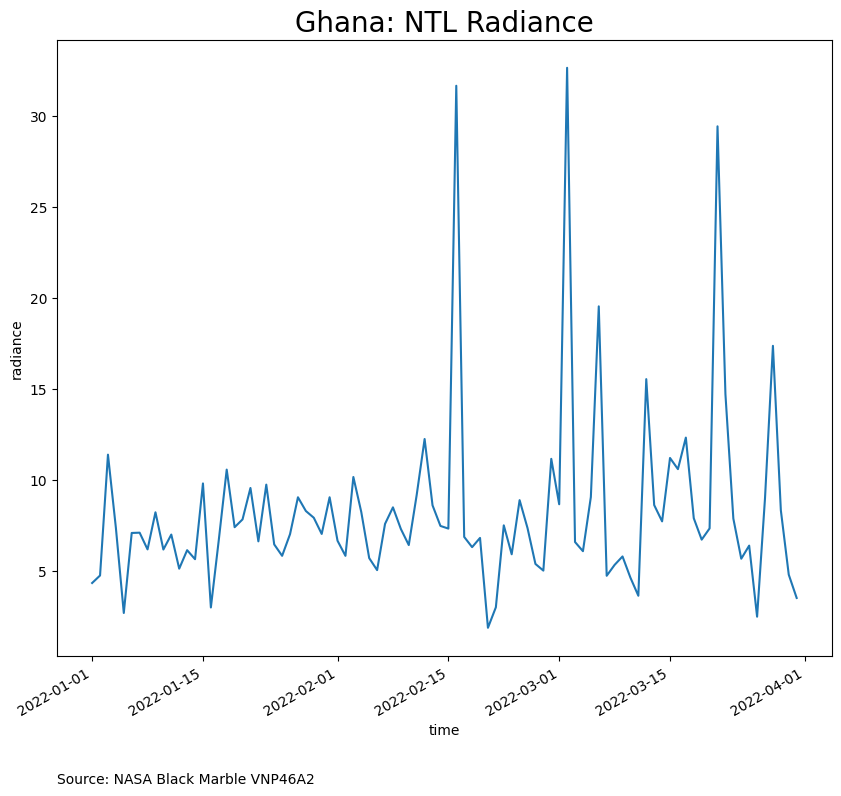

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))

r_daily.radiance.mean(dim=["x", "y"]).plot(ax=ax)

ax.text(
    0,
    -0.2,
    "Source: NASA Black Marble VNP46A2",
    ha="left",
    va="center",
    transform=ax.transAxes,
    fontsize=10,
    color="black",
    weight="normal",
)
ax.set_title("Ghana: NTL Radiance", fontsize=20);

In [15]:
#### Raster stack of monthly data
r_monthly = bm_raster(
    gdf,
    product_id="VNP46A3",
    date_range=pd.date_range("2022-01-01", "2022-12-31", freq="MS"),
    bearer=bearer,
)

QUEUEING TASKS | Downloading...:   0%|          | 0/48 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0.00/11.5M [00:00<?, ?B/s]

  0%|          | 0.00/8.64M [00:00<?, ?B/s]

  0%|          | 0.00/9.68M [00:00<?, ?B/s]

  0%|          | 0.00/8.28M [00:00<?, ?B/s]

  0%|          | 0.00/9.44M [00:00<?, ?B/s]

  0%|          | 0.00/8.05M [00:00<?, ?B/s]

  0%|          | 0.00/9.14M [00:00<?, ?B/s]

  0%|          | 0.00/9.35M [00:00<?, ?B/s]

  0%|          | 0.00/7.39M [00:00<?, ?B/s]

  0%|          | 0.00/9.48M [00:00<?, ?B/s]

  0%|          | 0.00/12.5M [00:00<?, ?B/s]

  0%|          | 0.00/9.13M [00:00<?, ?B/s]

  0%|          | 0.00/7.41M [00:00<?, ?B/s]

  0%|          | 0.00/10.2M [00:00<?, ?B/s]

  0%|          | 0.00/9.15M [00:00<?, ?B/s]

  0%|          | 0.00/9.58M [00:00<?, ?B/s]

  0%|          | 0.00/11.4M [00:00<?, ?B/s]

  0%|          | 0.00/8.42M [00:00<?, ?B/s]

  0%|          | 0.00/10.2M [00:00<?, ?B/s]

  0%|          | 0.00/7.97M [00:00<?, ?B/s]

  0%|          | 0.00/10.4M [00:00<?, ?B/s]

  0%|          | 0.00/7.41M [00:00<?, ?B/s]

  0%|          | 0.00/10.6M [00:00<?, ?B/s]

  0%|          | 0.00/7.62M [00:00<?, ?B/s]

  0%|          | 0.00/9.49M [00:00<?, ?B/s]

  0%|          | 0.00/8.26M [00:00<?, ?B/s]

  0%|          | 0.00/8.79M [00:00<?, ?B/s]

  0%|          | 0.00/7.53M [00:00<?, ?B/s]

  0%|          | 0.00/12.2M [00:00<?, ?B/s]

  0%|          | 0.00/10.0M [00:00<?, ?B/s]

  0%|          | 0.00/11.7M [00:00<?, ?B/s]

  0%|          | 0.00/9.00M [00:00<?, ?B/s]

  0%|          | 0.00/9.73M [00:00<?, ?B/s]

  0%|          | 0.00/7.82M [00:00<?, ?B/s]

  0%|          | 0.00/9.17M [00:00<?, ?B/s]

  0%|          | 0.00/7.79M [00:00<?, ?B/s]

  0%|          | 0.00/9.06M [00:00<?, ?B/s]

  0%|          | 0.00/8.50M [00:00<?, ?B/s]

  0%|          | 0.00/8.50M [00:00<?, ?B/s]

  0%|          | 0.00/7.96M [00:00<?, ?B/s]

  0%|          | 0.00/11.5M [00:00<?, ?B/s]

  0%|          | 0.00/7.80M [00:00<?, ?B/s]

  0%|          | 0.00/7.99M [00:00<?, ?B/s]

  0%|          | 0.00/10.6M [00:00<?, ?B/s]

  0%|          | 0.00/11.5M [00:00<?, ?B/s]

  0%|          | 0.00/8.44M [00:00<?, ?B/s]

  0%|          | 0.00/11.2M [00:00<?, ?B/s]

  0%|          | 0.00/8.50M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/48 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/12 [00:00<?, ?it/s]

In [16]:
r_monthly

<xarray.Dataset>
Dimensions:   (x: 1068, y: 1545, time: 12)
Coordinates:
  * x         (x) float64 -3.255 -3.251 -3.247 -3.242 ... 1.181 1.185 1.189
  * y         (y) float64 11.17 11.17 11.16 11.16 ... 4.754 4.75 4.746 4.742
  * time      (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2022-12-01
Data variables:
    radiance  (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/41)
    AlgorithmType:                     b'SCI'
    AlgorithmVersion:                  b'NPP_PR46A3 2.0.0'
    AREA_OR_POINT:                     Area
    Conventions:                       b'CF-1.6'
    creator_email:                     b'modis-ops@lists.nasa.gov'
    creator_name:                      b'VIIRS Land SIPS Processing Group'
    ...                                ...
    VerticalTileNumber:                b'07'
    WestBoundingCoord:                 -10.0
    scale_factor:                      1.0
    add_offset:                        0.0
    units:                             Watts per square meter per steradian (...
    description:                       Radiance

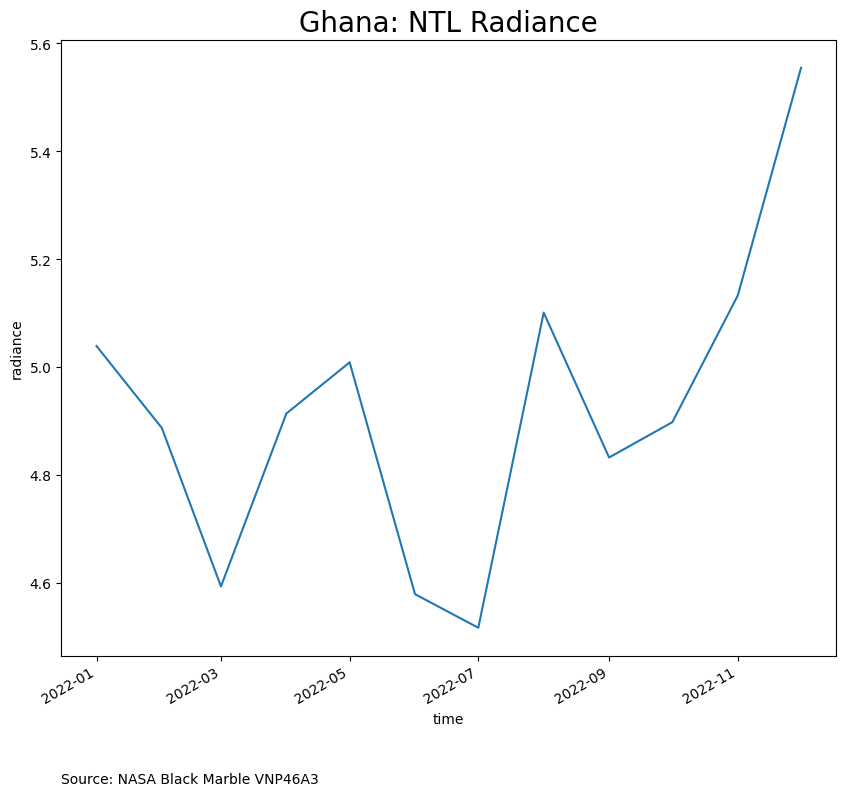

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))

r_monthly.radiance.mean(dim=["x", "y"]).plot(ax=ax)

ax.text(
    0,
    -0.2,
    "Source: NASA Black Marble VNP46A3",
    ha="left",
    va="center",
    transform=ax.transAxes,
    fontsize=10,
    color="black",
    weight="normal",
)
ax.set_title("Ghana: NTL Radiance", fontsize=20);

In [18]:
#### Raster stack of annual data
r_annual = bm_raster(
    gdf,
    product_id="VNP46A4",
    date_range=pd.date_range("2019-01-01", "2022-01-01", freq="YS"),
    bearer=bearer,
)

QUEUEING TASKS | Downloading...:   0%|          | 0/16 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0.00/13.2M [00:00<?, ?B/s]

  0%|          | 0.00/13.8M [00:00<?, ?B/s]

  0%|          | 0.00/13.8M [00:00<?, ?B/s]

  0%|          | 0.00/9.68M [00:00<?, ?B/s]

  0%|          | 0.00/13.4M [00:00<?, ?B/s]

  0%|          | 0.00/14.0M [00:00<?, ?B/s]

  0%|          | 0.00/9.66M [00:00<?, ?B/s]

  0%|          | 0.00/13.8M [00:00<?, ?B/s]

  0%|          | 0.00/9.66M [00:00<?, ?B/s]

  0%|          | 0.00/14.6M [00:00<?, ?B/s]

  0%|          | 0.00/9.18M [00:00<?, ?B/s]

  0%|          | 0.00/9.37M [00:00<?, ?B/s]

  0%|          | 0.00/9.55M [00:00<?, ?B/s]

  0%|          | 0.00/14.5M [00:00<?, ?B/s]

  0%|          | 0.00/9.68M [00:00<?, ?B/s]

[2023-12-06 15:30:04 - backoff:105 - INFO] Backing off _download_file(...) for 0.2s (httpx.ReadTimeout: The read operation timed out)


  0%|          | 0.00/8.98M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/16 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/4 [00:00<?, ?it/s]

In [19]:
r_annual

<xarray.Dataset>
Dimensions:   (x: 1068, y: 1545, time: 4)
Coordinates:
  * x         (x) float64 -3.255 -3.251 -3.247 -3.242 ... 1.181 1.185 1.189
  * y         (y) float64 11.17 11.17 11.16 11.16 ... 4.754 4.75 4.746 4.742
  * time      (time) datetime64[ns] 2019-01-01 2020-01-01 2021-01-01 2022-01-01
Data variables:
    radiance  (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/41)
    AlgorithmType:                     b'SCI'
    AlgorithmVersion:                  b'NPP_PR46A3 2.0.0'
    AREA_OR_POINT:                     Area
    Conventions:                       b'CF-1.6'
    DataResolution:                    b'15 arc second'
    DayNightFlag:                      b'Night'
    ...                                ...
    publisher_name:                    b'LAADS'
    publisher_url:                     b'https://ladsweb.modaps.eosdis.nasa.gov'
    SouthBoundingCoord:                10.0
    WestBoundingCoord:                 -10.0
    units:                             Watts per square meter per steradian (...
    description:                       Radiance

### Visualing trends in radiance year over year

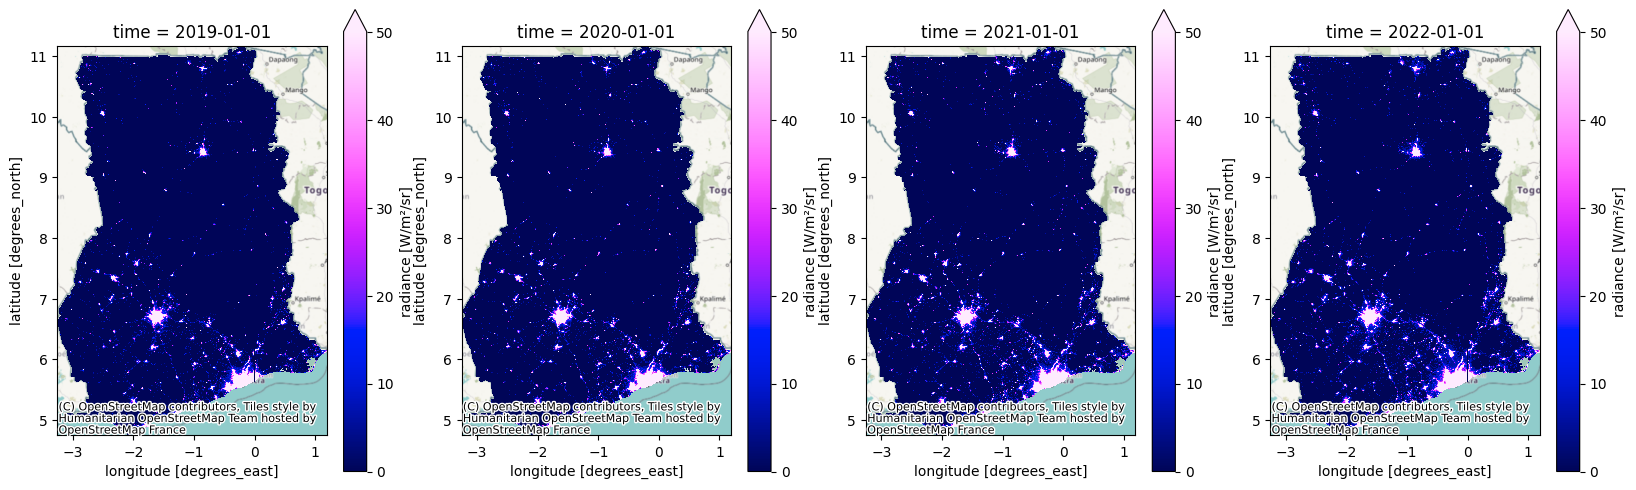

In [20]:
# Set up the figure and subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 6))

for i, t in enumerate(r_annual["time"]):
    ax = axs[i]
    r_annual.radiance.sel(time=t).plot.pcolormesh(
        ax=ax,
        cmap=cc.cm.bmw,
        robust=True,
        vmax=50,
    )
    cx.add_basemap(ax, crs=gdf.crs.to_string())

plt.show()

Lastly, we calculate the increase/decrease in nigthtime lights radiance levels.

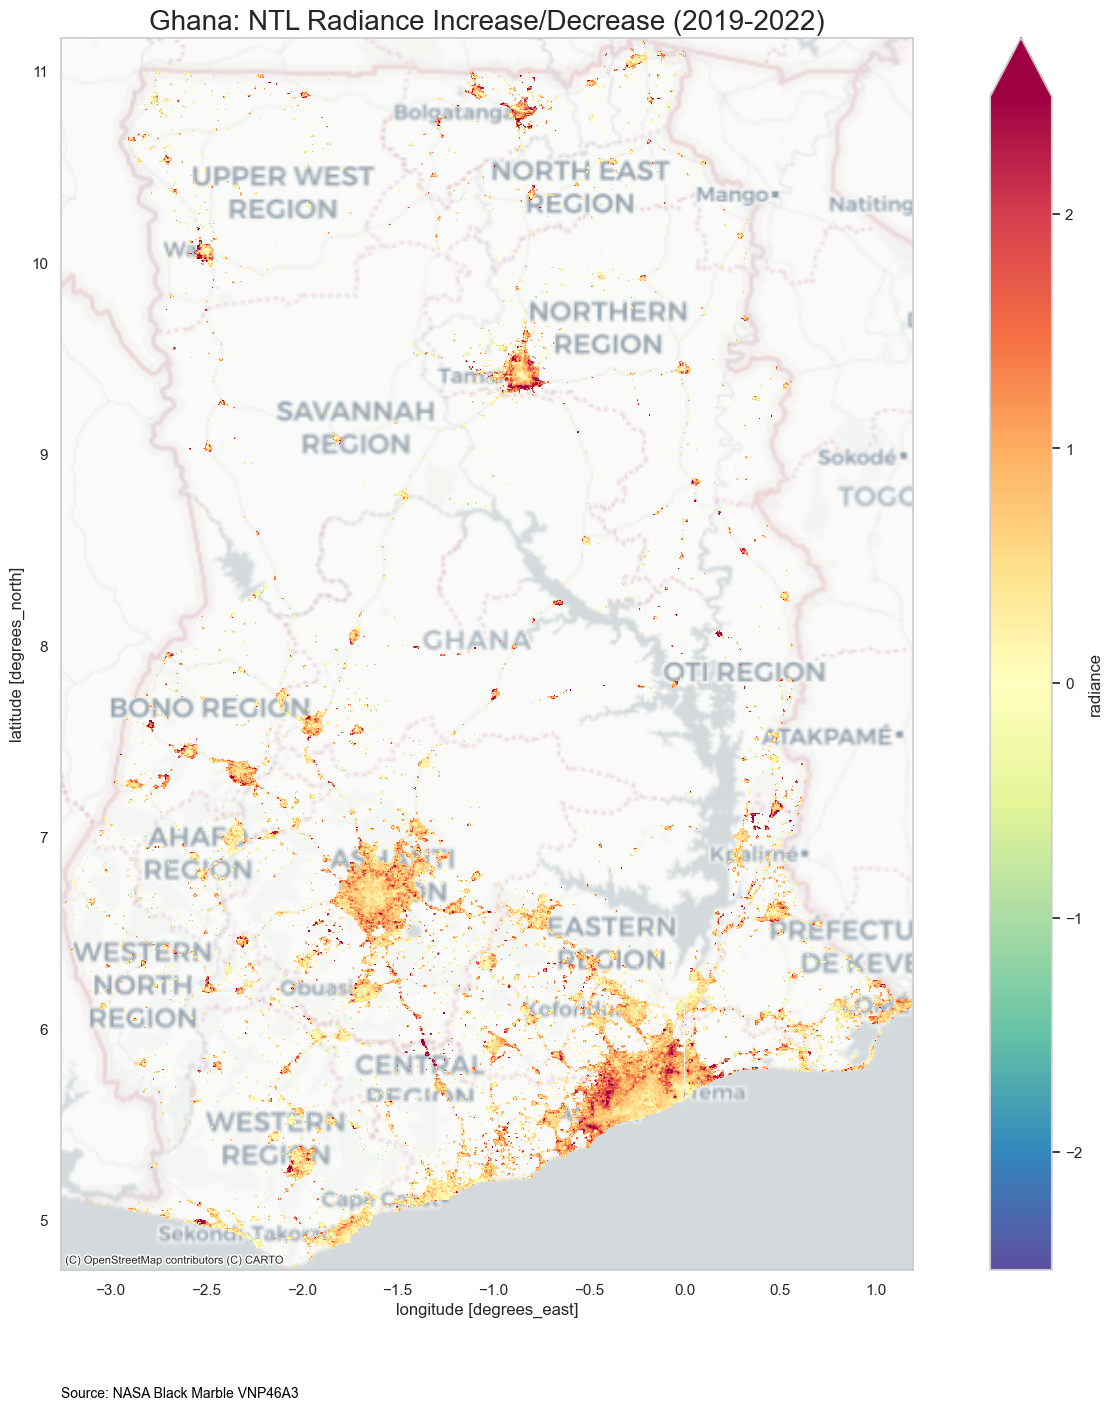

In [24]:
fig, ax = plt.subplots(figsize=(20, 16))

delta = (
    (
        (
            r_annual.radiance.sel(time="2022-01-01")
            - r_annual.radiance.sel(time="2019-01-01")
        )
        / r_annual.radiance.sel(time="2019-01-01")
    )
    .drop("time")
    .plot.pcolormesh(ax=ax, cmap="Spectral_r", robust=True)
)
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Positron)

ax.text(
    0,
    -0.1,
    "Source: NASA Black Marble VNP46A3",
    ha="left",
    va="center",
    transform=ax.transAxes,
    fontsize=10,
    color="black",
    weight="normal",
)
ax.set_title("Ghana: NTL Radiance Increase/Decrease (2019-2022)", fontsize=20);

## Compute trends on nighttime lights over time

In this sectiom, use the `bm_extract` function to observe treends in nighttime lights over time. The `bm_extract` function leverages the [rasterstats](https://pythonhosted.org/rasterstats/) package to aggregate nighttime lights data to polygons. In the following example, we show trends in annual nighttime lights data across Ghana's first-administrative divisions.

In [22]:
data = bm_extract(
    gdf,
    "VNP46A4",
    pd.date_range("2012-01-01", "2022-01-01", freq="YS"),
    bearer,
)

QUEUEING TASKS | Downloading...:   0%|          | 0/44 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0.00/14.5M [00:00<?, ?B/s]

  0%|          | 0.00/14.2M [00:00<?, ?B/s]

  0%|          | 0.00/14.6M [00:00<?, ?B/s]

  0%|          | 0.00/9.63M [00:00<?, ?B/s]

  0%|          | 0.00/8.24M [00:00<?, ?B/s]

  0%|          | 0.00/13.7M [00:00<?, ?B/s]

  0%|          | 0.00/11.7M [00:00<?, ?B/s]

  0%|          | 0.00/14.9M [00:00<?, ?B/s]

  0%|          | 0.00/8.98M [00:00<?, ?B/s]

  0%|          | 0.00/13.7M [00:00<?, ?B/s]

  0%|          | 0.00/10.6M [00:00<?, ?B/s]

  0%|          | 0.00/9.77M [00:00<?, ?B/s]

  0%|          | 0.00/14.2M [00:00<?, ?B/s]

  0%|          | 0.00/9.66M [00:00<?, ?B/s]

  0%|          | 0.00/8.84M [00:00<?, ?B/s]

  0%|          | 0.00/13.2M [00:00<?, ?B/s]

  0%|          | 0.00/13.1M [00:00<?, ?B/s]

  0%|          | 0.00/8.17M [00:00<?, ?B/s]

  0%|          | 0.00/14.1M [00:00<?, ?B/s]

  0%|          | 0.00/12.9M [00:00<?, ?B/s]

  0%|          | 0.00/9.85M [00:00<?, ?B/s]

  0%|          | 0.00/8.23M [00:00<?, ?B/s]

  0%|          | 0.00/13.5M [00:00<?, ?B/s]

  0%|          | 0.00/9.68M [00:00<?, ?B/s]

  0%|          | 0.00/13.2M [00:00<?, ?B/s]

  0%|          | 0.00/9.68M [00:00<?, ?B/s]

  0%|          | 0.00/13.4M [00:00<?, ?B/s]

  0%|          | 0.00/9.55M [00:00<?, ?B/s]

  0%|          | 0.00/13.3M [00:00<?, ?B/s]

  0%|          | 0.00/8.52M [00:00<?, ?B/s]

  0%|          | 0.00/13.7M [00:00<?, ?B/s]

  0%|          | 0.00/9.42M [00:00<?, ?B/s]

  0%|          | 0.00/13.3M [00:00<?, ?B/s]

  0%|          | 0.00/8.34M [00:00<?, ?B/s]

  0%|          | 0.00/13.9M [00:00<?, ?B/s]

  0%|          | 0.00/9.38M [00:00<?, ?B/s]

  0%|          | 0.00/13.8M [00:00<?, ?B/s]

  0%|          | 0.00/13.8M [00:00<?, ?B/s]

  0%|          | 0.00/9.18M [00:00<?, ?B/s]

  0%|          | 0.00/9.68M [00:00<?, ?B/s]

  0%|          | 0.00/13.8M [00:00<?, ?B/s]

  0%|          | 0.00/9.37M [00:00<?, ?B/s]

  0%|          | 0.00/14.0M [00:00<?, ?B/s]

  0%|          | 0.00/9.66M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/44 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/11 [00:00<?, ?it/s]

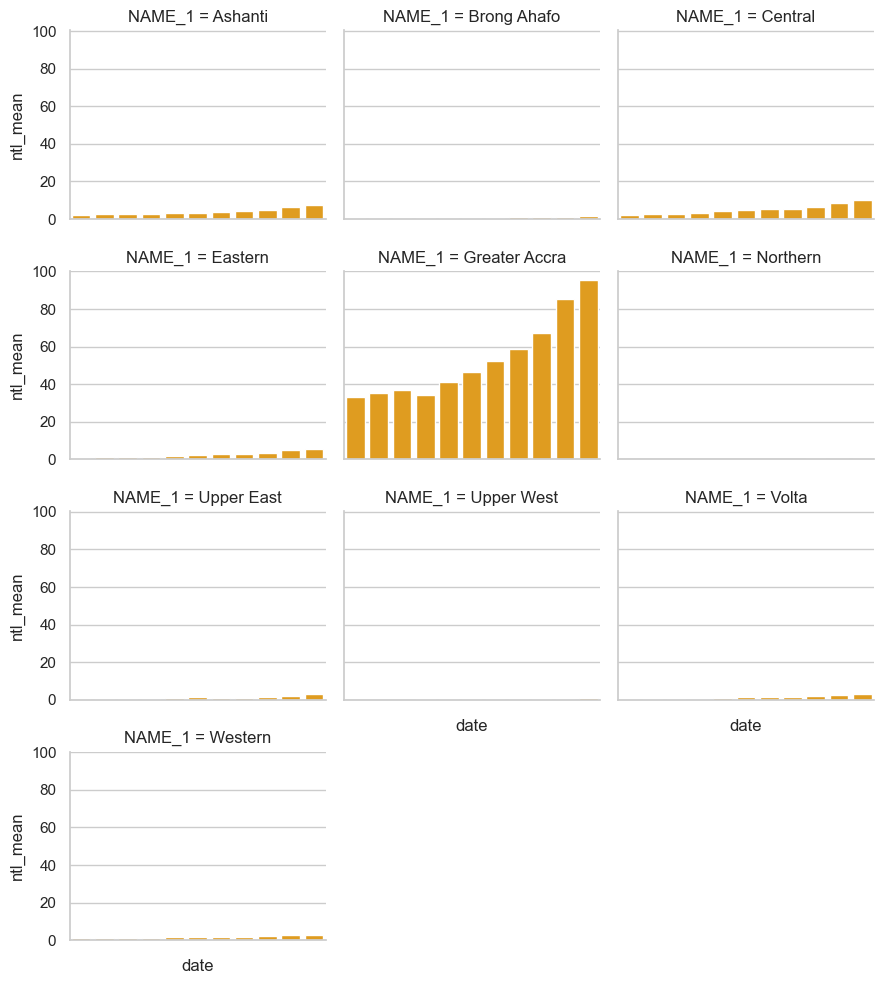

In [23]:
sns.set(style="whitegrid")

g = sns.catplot(
    data=data,
    kind="bar",
    x="date",
    y="ntl_mean",
    col="NAME_1",
    height=2.5,
    col_wrap=3,
    aspect=1.2,
    color="orange",
)

# Set the x-axis rotation for better visibility
g.set_xticklabels(rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()